# Import Necessary Libraries

## Load required libraries for data manipulation, visualization, and machine learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets

## Load training and test datasets

In [4]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Get a summary of the data

## Display basic information about the training dataset

In [7]:
print("\n--- Train Dataset Info ---")
print(train_df.info())


--- Train Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-

## Describe the training dataset to understand the distribution of numeric features

In [9]:
print("\n--- Train Dataset Description ---")
print(train_df.describe())


--- Train Dataset Description ---
                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.6

# Check for missing values

## Identify and print missing values for each feature in the training dataset

In [12]:
missing_values = train_df.isnull().sum()
print("\n--- Missing Values in Train Dataset ---")
print(missing_values[missing_values > 0].sort_values(ascending=False))


--- Missing Values in Train Dataset ---
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


## Drop columns where more than 60% of the values are missing

In [15]:
threshold = 0.6 
print("\n--- Dropping Columns with More Than 60% Missing Values ---")
columns_before = train_df.shape[1]
train_df = train_df.loc[:, train_df.isnull().mean() < threshold]
columns_after = train_df.shape[1]
print(f"Dropped {columns_before - columns_after} columns. Remaining columns: {columns_after}")


--- Dropping Columns with More Than 60% Missing Values ---
Dropped 4 columns. Remaining columns: 77


# Refined imputation strategy for numeric features

## Impute missing values for numeric columns based on specific strategies

### Use correlation with SalePrice to decide between median or mean imputation

In [19]:
to_impute_numeric = train_df.select_dtypes(include=['float64', 'int64']).columns
for column in to_impute_numeric:
    if train_df[column].isnull().sum() > 0:
        if column == 'LotFrontage':
            # Impute LotFrontage based on the median LotFrontage of the same Neighborhood
            print(f"\n--- Imputing LotFrontage ---")
            train_df['LotFrontage'] = train_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
            print(f"Imputed missing values in 'LotFrontage' based on Neighborhood median.")
        elif column == 'GarageYrBlt':
            # Impute GarageYrBlt: If there's no garage, set GarageYrBlt to 0
            print(f"\n--- Imputing GarageYrBlt ---")
            missing_garageyrblt = train_df['GarageYrBlt'].isnull().sum()
            train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(0)
            print(f"Imputed {missing_garageyrblt} missing values in 'GarageYrBlt' with 0 for properties without a garage.")
        else:
            # Use correlation to determine better imputation values for numeric features
            corr_with_saleprice = train_df[column].corr(train_df['SalePrice'])
            if corr_with_saleprice > 0.5:
                # If highly correlated with SalePrice, use median to avoid outliers
                print(f"Imputing missing values in numeric column '{column}' with median due to high correlation with SalePrice.")
                train_df[column].fillna(train_df[column].median(), inplace=True)
            else:
                # If not highly correlated, use mean imputation
                print(f"Imputing missing values in numeric column '{column}' with mean.")
                train_df[column].fillna(train_df[column].mean(), inplace=True)


--- Imputing LotFrontage ---
Imputed missing values in 'LotFrontage' based on Neighborhood median.
Imputing missing values in numeric column 'MasVnrArea' with mean.

--- Imputing GarageYrBlt ---
Imputed 81 missing values in 'GarageYrBlt' with 0 for properties without a garage.


/var/folders/qd/rqkfmxt15ts3f6bfn0d6988m0000gn/T/ipykernel_27663/576036045.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mean(), inplace=True)


# Impute MasVnrType based on MasVnrArea

In [21]:
## Impute missing values in MasVnrType based on MasVnrArea
print("\n--- Imputing MasVnrType ---")
masvnr_missing = train_df['MasVnrType'].isnull().sum()
train_df['MasVnrType'] = train_df.apply(lambda row: 'None' if row['MasVnrArea'] == 0 else row['MasVnrType'], axis=1)
train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode().iloc[0], inplace=True)
print(f"Imputed {masvnr_missing} missing values in 'MasVnrType'.")

# Impute Basement-related features
## Handle missing values in basement-related features based on the presence of a basement
bsmt_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
print("\n--- Imputing Basement-Related Features ---")
for feature in bsmt_features:
    missing_bsmt = train_df[feature].isnull().sum()
    train_df[feature] = train_df.apply(lambda row: 'NA' if row['TotalBsmtSF'] == 0 else row[feature], axis=1)
    train_df[feature].fillna(train_df[feature].mode().iloc[0], inplace=True)
    print(f"Imputed {missing_bsmt} missing values in '{feature}'.")

# Impute FireplaceQu
## Impute missing values in FireplaceQu based on the presence of a fireplace
print("\n--- Imputing FireplaceQu ---")
train_df['FireplaceQu'] = train_df.apply(lambda row: 'NA' if row['Fireplaces'] == 0 else row['FireplaceQu'], axis=1)
train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode().iloc[0], inplace=True)
print(f"Imputed missing values in 'FireplaceQu'.")

# Impute Garage-related features
## Handle missing values in garage-related features based on the presence of a garage
garage_features = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
print("\n--- Imputing Garage-Related Features ---")
for feature in garage_features:
    missing_garage = train_df[feature].isnull().sum()
    train_df[feature] = train_df.apply(lambda row: 'NA' if row['GarageYrBlt'] == 0 else row[feature], axis=1)
    train_df[feature].fillna(train_df[feature].mode().iloc[0], inplace=True)
    print(f"Imputed {missing_garage} missing values in '{feature}'.")

# Impute Electrical if there are missing values
## Handle missing values in Electrical feature
if train_df['Electrical'].isnull().sum() > 0:
    print("\n--- Imputing Electrical ---")
    train_df['Electrical'].fillna(train_df['Electrical'].mode().iloc[0], inplace=True)
    print("Imputed missing value in 'Electrical' with mode.")


--- Imputing MasVnrType ---
Imputed 872 missing values in 'MasVnrType'.

--- Imputing Basement-Related Features ---
Imputed 37 missing values in 'BsmtQual'.
Imputed 37 missing values in 'BsmtCond'.
Imputed 38 missing values in 'BsmtExposure'.
Imputed 37 missing values in 'BsmtFinType1'.
Imputed 38 missing values in 'BsmtFinType2'.

--- Imputing FireplaceQu ---


/var/folders/qd/rqkfmxt15ts3f6bfn0d6988m0000gn/T/ipykernel_27663/1082573919.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode().iloc[0], inplace=True)
/var/folders/qd/rqkfmxt15ts3f6bfn0d6988m0000gn/T/ipykernel_27663/1082573919.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

Imputed missing values in 'FireplaceQu'.

--- Imputing Garage-Related Features ---
Imputed 81 missing values in 'GarageType'.
Imputed 81 missing values in 'GarageFinish'.
Imputed 81 missing values in 'GarageQual'.
Imputed 81 missing values in 'GarageCond'.

--- Imputing Electrical ---
Imputed missing value in 'Electrical' with mode.


/var/folders/qd/rqkfmxt15ts3f6bfn0d6988m0000gn/T/ipykernel_27663/1082573919.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode().iloc[0], inplace=True)
/var/folders/qd/rqkfmxt15ts3f6bfn0d6988m0000gn/T/ipykernel_27663/1082573919.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obje

In [22]:
# Identify columns for encoding
## Identify columns that need to be one-hot encoded
print("\n--- Identifying Columns for Encoding ---")
columns_to_encode = []
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        # Check if the object column can be converted to numeric
        try:
            train_df[column] = pd.to_numeric(train_df[column])
            print(f"Converted column '{column}' to numeric.")
        except ValueError:
            # If it can't be converted, add to columns_to_encode
            columns_to_encode.append(column)
    elif train_df[column].dtype in ['int64', 'float64']:
        unique_values = train_df[column].nunique()
        if unique_values < 100:
            print(f"Column '{column}' has {unique_values} unique values, considering it for encoding.")
            columns_to_encode.append(column)


--- Identifying Columns for Encoding ---
Column 'MSSubClass' has 15 unique values, considering it for encoding.
Column 'OverallQual' has 10 unique values, considering it for encoding.
Column 'OverallCond' has 9 unique values, considering it for encoding.
Column 'YearRemodAdd' has 61 unique values, considering it for encoding.
Column 'LowQualFinSF' has 24 unique values, considering it for encoding.
Column 'BsmtFullBath' has 4 unique values, considering it for encoding.
Column 'BsmtHalfBath' has 3 unique values, considering it for encoding.
Column 'FullBath' has 4 unique values, considering it for encoding.
Column 'HalfBath' has 3 unique values, considering it for encoding.
Column 'BedroomAbvGr' has 8 unique values, considering it for encoding.
Column 'KitchenAbvGr' has 4 unique values, considering it for encoding.
Column 'TotRmsAbvGrd' has 12 unique values, considering it for encoding.
Column 'Fireplaces' has 4 unique values, considering it for encoding.
Column 'GarageYrBlt' has 98 uni

# One-hot encode categorical features

## One-hot encode categorical features to convert them into numerical format

In [25]:
print("\n--- One-Hot Encoding Categorical Features ---")
train_df = pd.get_dummies(train_df, columns=columns_to_encode)
print(f"Dataset shape after one-hot encoding: {train_df.shape}")


--- One-Hot Encoding Categorical Features ---
Dataset shape after one-hot encoding: (1460, 672)


# Correlation with SalePrice

In [27]:
## Calculate correlation with SalePrice and identify important features
print("\n--- Correlation with SalePrice ---")
corr_matrix = train_df.corr()


--- Correlation with SalePrice ---


# Selecting highly correlated features

## Select features that are highly correlated with SalePrice for model training

In [30]:
threshold = 0.5
strong_corrs = corr_matrix['SalePrice'][abs(corr_matrix['SalePrice']) > threshold]
selected_features = strong_corrs.index.tolist()
print(f"Selected features based on correlation threshold of {threshold}: {selected_features}")

Selected features based on correlation threshold of 0.5: ['YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'SalePrice', 'ExterQual_TA', 'BsmtQual_Ex', 'FullBath_1', 'KitchenQual_Ex', 'KitchenQual_TA', 'GarageCars_3']


# Splitting Data into Training and Validation Sets

## Split the dataset into training and validation sets

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

X = train_df[selected_features].drop('SalePrice', axis=1)
y = train_df['SalePrice']

print("\n--- Splitting Data into Training and Validation Sets ---")
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}, Validation set size: {X_valid.shape}")


--- Splitting Data into Training and Validation Sets ---
Training set size: (1168, 11), Validation set size: (292, 11)


# Training RandomForest Model

## Train a RandomForest model to predict SalePrice

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

print("\n--- Training RandomForest Model ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


--- Training RandomForest Model ---


RandomForestRegressor(random_state=42)

# Make predictions

## Make predictions on the validation set using the trained RandomForest model

In [39]:
y_rf_pred = rf_model.predict(X_valid)

In [40]:
# Calculate RMSE for RandomForest

In [41]:
## Calculate the Root Mean Squared Error (RMSE) to evaluate model performance

In [42]:
rmse_rf = np.sqrt(mean_squared_error(y_valid, y_rf_pred))
print(f'Root Mean Squared Error (RandomForest): {rmse_rf}')

# Cross-Validation for RandomForest
## Perform cross-validation to assess the model's generalizability
print("\n--- Cross-Validation for RandomForest Model ---")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE Scores: {-cv_scores}")
print(f"Average Cross-Validation RMSE: {np.mean(-cv_scores)}")

Root Mean Squared Error (RandomForest): 31740.19452235214

--- Cross-Validation for RandomForest Model ---
Cross-Validation RMSE Scores: [30281.19182871 45743.16800043 36910.41307448 33656.96040348
 27199.04633054]
Average Cross-Validation RMSE: 34758.15592752815


# Hyperparameter Tuning for RandomForest

## Perform grid search to tune hyperparameters of the RandomForest model

In [45]:
print("\n--- Hyperparameter Tuning for RandomForest Model ---")
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Best Parameters from GridSearch
## Output the best hyperparameters found by grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


--- Hyperparameter Tuning for RandomForest Model ---
Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=10, max_features=auto, 

/Users/abdulrahman/Desktop/ML_Come_Up/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
243 fits failed out of a total of 486.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
221 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/abdulrahman/Desktop/ML_Come_Up/ml/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/abdulrahman/Desktop/ML_Come_Up/ml/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/abdulrahman/Desktop/ML_Come_Up/ml/lib/python3.12/site-packages/sklearn/base.py", line 6

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


# Train Best RandomForest model

## Train the RandomForest model with the best parameters obtained from grid search

In [48]:
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions with the best model
## Predict SalePrice on the validation set using the best RandomForest model
y_best_rf_pred = best_rf_model.predict(X_valid)

# Calculate RMSE for the best RandomForest model
## Calculate RMSE for the tuned RandomForest model
rmse_best_rf = np.sqrt(mean_squared_error(y_valid, y_best_rf_pred))
print(f'Root Mean Squared Error (Best RandomForest): {rmse_best_rf}')

Root Mean Squared Error (Best RandomForest): 31557.380789548915


# Create DataFrame for Actual vs Predicted (Best Random Forest)

In [50]:
## Create a DataFrame to compare actual vs predicted values
actual_vs_pred_df_rf = pd.DataFrame({'Actual': y_valid, 'Predicted': y_best_rf_pred})
actual_vs_pred_df_rf['Actual'] = actual_vs_pred_df_rf['Actual'].apply(lambda x: np.round(x, 2))
actual_vs_pred_df_rf['Predicted'] = actual_vs_pred_df_rf['Predicted'].apply(lambda x: np.round(x, 2))

# Display Actual vs Predicted SalePrice DataFrame (Best Random Forest)
## Display the first few rows of actual vs predicted SalePrice
actual_vs_pred_df_rf['SalePrice (Actual)'] = actual_vs_pred_df_rf['Actual']
actual_vs_pred_df_rf['SalePrice (Predicted)'] = actual_vs_pred_df_rf['Predicted']
print("\n--- SalePrice (Actual vs Predicted) (Best Random Forest) ---")
print(actual_vs_pred_df_rf[['SalePrice (Actual)', 'SalePrice (Predicted)']].head())


--- SalePrice (Actual vs Predicted) (Best Random Forest) ---
      SalePrice (Actual)  SalePrice (Predicted)
892               154500              135780.25
1105              325000              309218.46
413               115000              111847.78
522               159000              139292.16
1036              315500              305200.47


# Plotting Actual vs Predicted Sale Prices

## Visualize the comparison between actual and predicted Sale Prices

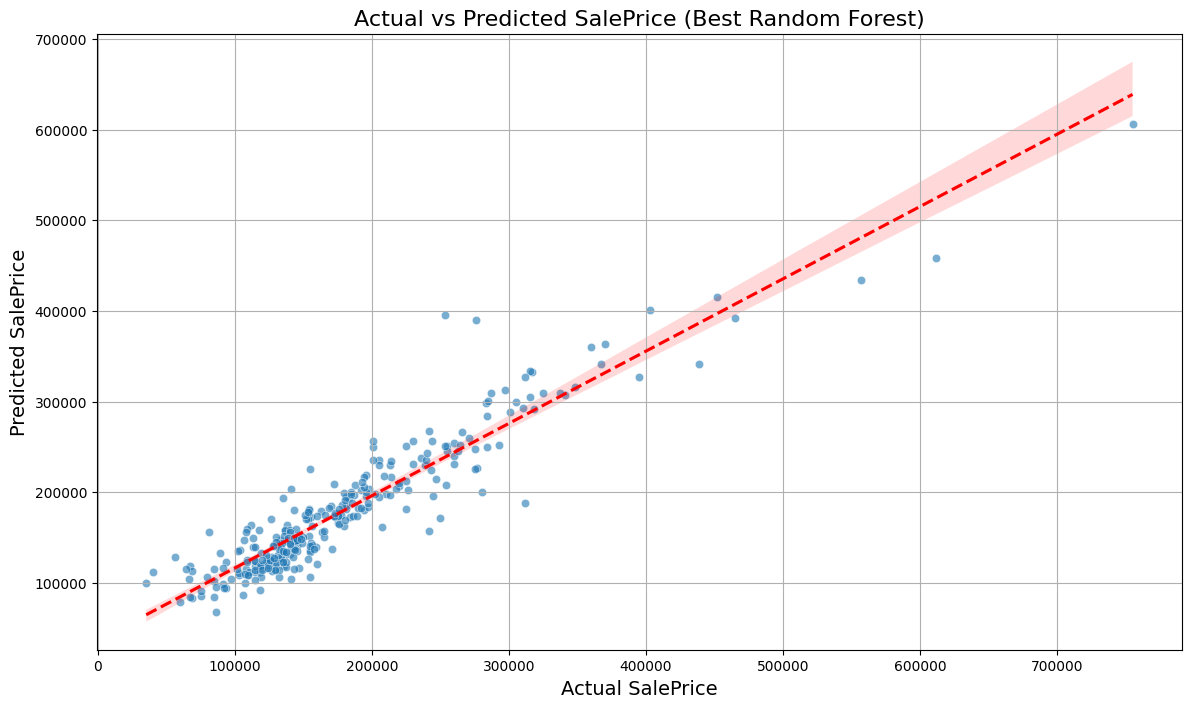

In [56]:
# Plot Actual vs Predicted SalePrice using Seaborn - Improved Visualization
plt.figure(figsize=(14, 8))
sns.scatterplot(x='SalePrice (Actual)', y='SalePrice (Predicted)', data=actual_vs_pred_df_rf, alpha=0.6)
sns.regplot(x='SalePrice (Actual)', y='SalePrice (Predicted)', data=actual_vs_pred_df_rf, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.xlabel('Actual SalePrice', fontsize=14)
plt.ylabel('Predicted SalePrice', fontsize=14)
plt.title('Actual vs Predicted SalePrice (Best Random Forest)', fontsize=16)
plt.grid(True)
plt.show()

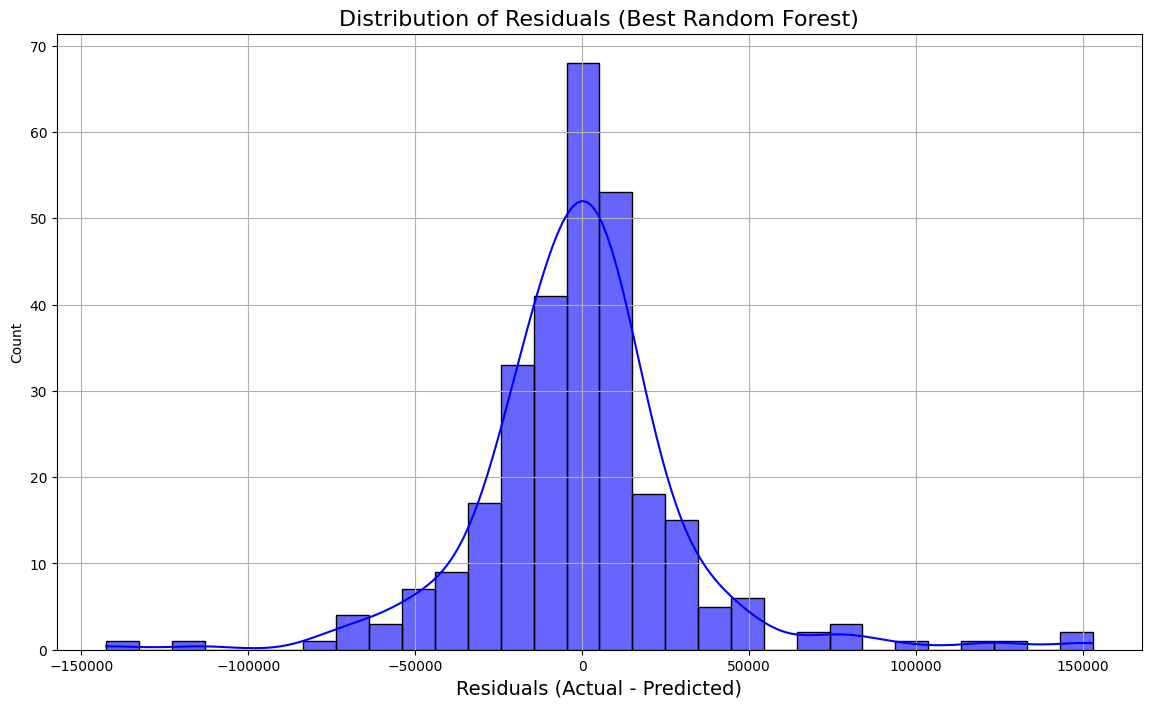

[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=

In [57]:
# Residual Plot to Evaluate Errors
plt.figure(figsize=(14, 8))
residuals = actual_vs_pred_df_rf['SalePrice (Actual)'] - actual_vs_pred_df_rf['SalePrice (Predicted)']
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.6)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=14)
plt.title('Distribution of Residuals (Best Random Forest)', fontsize=16)
plt.grid(True)
plt.show()